In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import util, data
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

In [2]:
image = cv2.imread("/kaggle/input/road-accidents-from-cctv-footages-dataset/Accident/Accident/900.jpg", cv2.IMREAD_GRAYSCALE)

<small> Membaca gambar dari dataset dalam mode grayscale (hitam-putih) agar lebih sederhana untuk pemrosesan. <small>

#### Tambahkan Noise

In [3]:
noisy_sp = util.random_noise(image, mode='s&p')  # Salt & Pepper
noisy_gaussian = util.random_noise(image, mode='gaussian')  # Gaussian

<Small> Mensimulasikan gangguan noise yang umum terjadi di CCTV: Salt & Pepper (acak putih/hitam) dan Gaussian (kabur). <small>

#### Konversi ke uint8 (0–255)

In [4]:
noisy_sp_uint8 = (noisy_sp * 255).astype(np.uint8)
noisy_gaussian_uint8 = (noisy_gaussian * 255).astype(np.uint8)

<small> Konversi kembali ke bentuk gambar 8-bit (0–255) agar bisa diproses oleh OpenCV. <small>

#### Terapkan Filter Median Filter

In [5]:
median_filtered = cv2.medianBlur(noisy_sp_uint8, 3)

<small> Median Filter → untuk menghilangkan Salt & Pepper noise. <small>

#### Bilateral Filter

In [6]:
bilateral_filtered = cv2.bilateralFilter(noisy_gaussian_uint8, d=9, sigmaColor=75, sigmaSpace=75)

<small> Bilateral Filter → untuk menghaluskan Gaussian noise tanpa menghilangkan tepi gambar. <small>

#### Evaluasi: PSNR & SSIM

In [7]:
def evaluate(original, denoised):
    score_psnr = psnr(original, denoised, data_range=255)
    score_ssim = ssim(original, denoised, data_range=255)
    return score_psnr, score_ssim

psnr_median, ssim_median = evaluate(image, median_filtered)
psnr_bilateral, ssim_bilateral = evaluate(image, bilateral_filtered)

<small> PSNR (Peak Signal-to-Noise Ratio): Ukuran seberapa jauh citra hasil terhadap aslinya dalam bentuk desibel.

SSIM (Structural Similarity Index): Ukuran kemiripan struktur dan tekstur antar gambar. <small>

#### Visualisasi

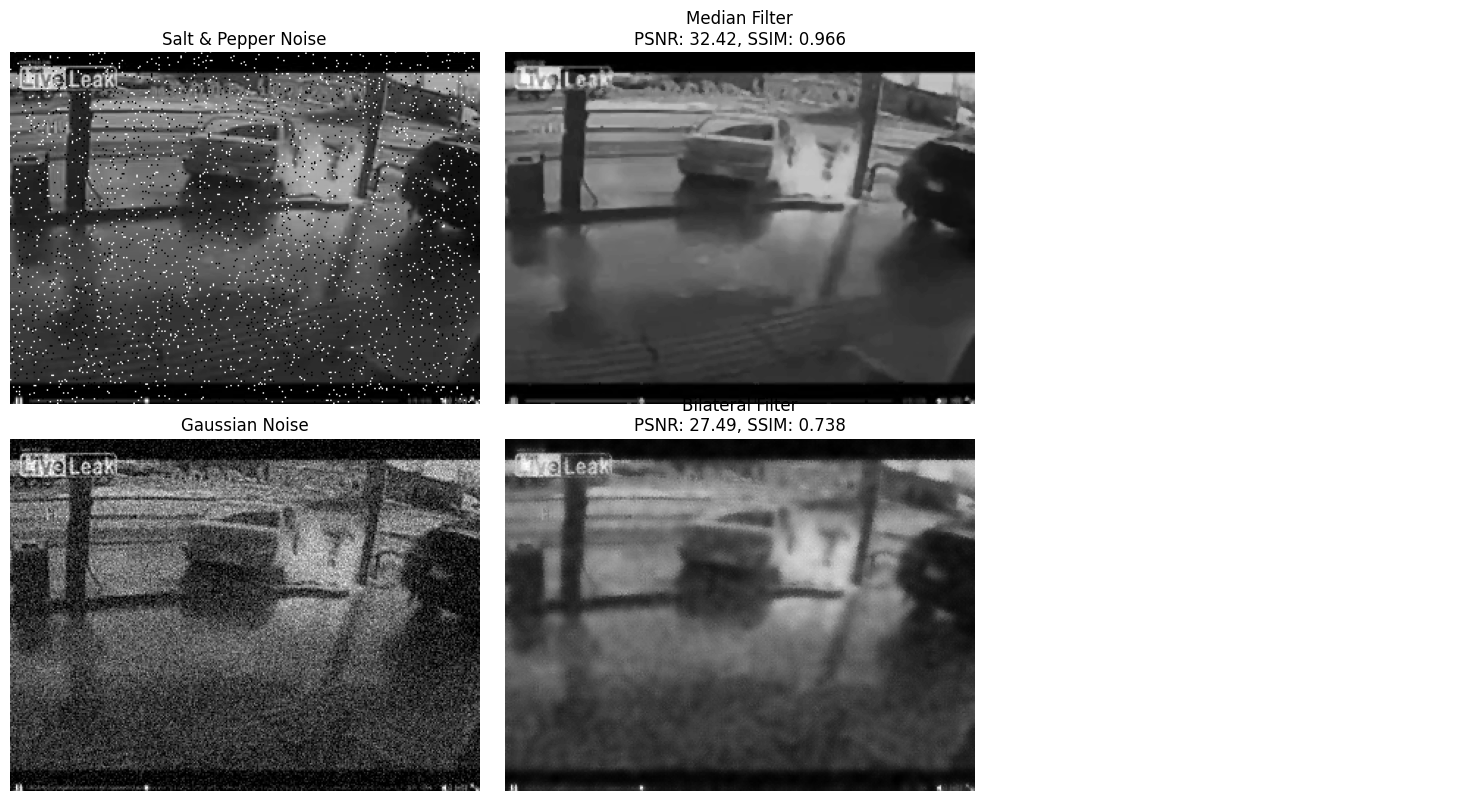

In [8]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

# Salt & Pepper + Median
axs[0, 0].imshow(noisy_sp_uint8, cmap='gray')
axs[0, 0].set_title("Salt & Pepper Noise")
axs[0, 1].imshow(median_filtered, cmap='gray')
axs[0, 1].set_title(f"Median Filter\nPSNR: {psnr_median:.2f}, SSIM: {ssim_median:.3f}")
axs[0, 2].axis('off')

# Gaussian + Bilateral
axs[1, 0].imshow(noisy_gaussian_uint8, cmap='gray')
axs[1, 0].set_title("Gaussian Noise")
axs[1, 1].imshow(bilateral_filtered, cmap='gray')
axs[1, 1].set_title(f"Bilateral Filter\nPSNR: {psnr_bilateral:.2f}, SSIM: {ssim_bilateral:.3f}")
axs[1, 2].axis('off')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

== Diskusi Evaluasi ==
Median Filter (Salt & Pepper):    PSNR = 32.42, SSIM = 0.966
Bilateral Filter (Gaussian):       PSNR = 27.49, SSIM = 0.738

Analisis:
- Median Filter sangat efektif mereduksi Salt & Pepper noise karena mengganti piksel ekstrim dengan nilai tengah dari tetangga.
- Bilateral Filter mampu mereduksi Gaussian noise sambil mempertahankan tepi, hasilnya lebih halus tanpa blur berlebihan.
